In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sn
from adjustText import adjust_text # Evite les labels superposés

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
# plot
from matplotlib.lines import Line2D
def volcano_plot(data, pval):
    
    data["-log10"] = -(np.log10(data["padj"]))
    data = pd.DataFrame.dropna(data)
    data["diffexpressed"] = "NO"
    # if log2Foldchange > 2 and pvalue < 0.05, set as "UP" 
    data["diffexpressed"][(data["log2FoldChange"] > 2) & (data["padj"] < pval)] = "UP"
    # if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"
    data["diffexpressed"][(data["log2FoldChange"] < -2) & (data["padj"] < pval)] = "DOWN"
    data["diffexpressed"][(data["log2FoldChange"] > -1) & (data["log2FoldChange"] < 1)] = "NONE"
    data["label"] = np.nan
    data["label"][data["diffexpressed"] != "NO"] = data["symbol"][data["diffexpressed"] != "NO"]
    mycolors = []
    labels={'UP': 'red','DOWN':'blue','NO':'grey'}
    for i in data['diffexpressed']:
        if i == 'NONE':
            mycolors.append('white')
        elif i == 'UP':
            mycolors.append('red')
        elif i == 'DOWN':
            mycolors.append('blue')
        elif i == "NO":
            mycolors.append('grey')
    
    fig, ax = plt.subplots(figsize=(15,10))

    x = data['log2FoldChange']
    y = data['-log10']
    n = data["symbol"]
    texte = []

    ax.scatter(x, y, c=mycolors)

    for i, txt in enumerate(n):
        if (x.iloc[i] > 5 and y.iloc[i] > 8) or (x.iloc[i] < -5 and y.iloc[i] > 8):
            texte += [ax.text(x.iloc[i], y.iloc[i],txt)]

    ax.set_xlabel("log2FoldChange",fontsize=22)
    ax.set_ylabel("-log10",fontsize=22)
    legend_elements = [Line2D([0], [0], marker='o',color='w', label='UP',markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Down',markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='NO',markerfacecolor='grey', markersize=15)]
    ax.legend(handles=legend_elements, title="Expression", loc="upper left")
    adjust_text(texte)
    return plt.show()

In [3]:
data1 = pd.read_csv("Transcriptomic/all_de_j2_vs_j0_allgenes.txt", sep='\t') # fichier excel sous le format "ANSI" -> 
#sous excel on transforme on remplace les virgules des séparateurs de décimal par des points 
#pour les calculs sur le DataFrame et on enregistre en fichier txt pour l'encodage 'utf-8' 
data2 = pd.read_csv('Transcriptomic/all_de_j4_vs_j0_allgenes.txt', sep='\t')
data3 = pd.read_csv('Transcriptomic/all_de_j4_vs_j2_allgenes.txt', sep='\t')
# volcano_plot(data1)
# volcano_plot(data2)
# volcano_plot(data3)

interactive(children=(SelectMultiple(description='data', options=(          symbol      baseMean  log2FoldChan…

<function __main__.volcano_plot(data, pval)>

In [4]:
prot_data = pd.read_csv("Proteomique/Experience_1/210414-DT-0241-0249-(1).txt", sep='\t', skiprows=1)
prot_data.iloc[:,[2,3,21,30,31,32,36,37,38]]

,Accession,Description,Gene Symbol,Abundance Ratio (log2): (T48h) / (T0),Abundance Ratio (log2): (T96h) / (T0),Abundance Ratio (log2): (T96h) / (T48h),Abundance Ratio Adj. P-Value: (T48h) / (T0),Abundance Ratio Adj. P-Value: (T96h) / (T0),Abundance Ratio Adj. P-Value: (T96h) / (T48h)
0,P21333,Filamin-A OS=Homo sapiens OX=9606 GN=FLNA PE=1...,FLNA,0.28,0.11,-0.17,0.840755,0.990871,0.998956
1,P02751,Fibronectin OS=Homo sapiens OX=9606 GN=FN1 PE=...,NaN,0.43,1.10,0.63,0.502648,0.208298,0.357915
2,Q15149,Plectin OS=Homo sapiens OX=9606 GN=PLEC PE=1 SV=3,PLEC,0.40,0.43,0.05,0.571962,0.881723,0.991557
3,P35579,Myosin-9 OS=Homo sapiens OX=9606 GN=MYH9 PE=1 ...,MYH9,0.63,0.18,-0.43,0.138462,0.984753,0.952977
4,P12111,Collagen alpha-3(VI) chain OS=Homo sapiens OX=...,COL6A3,1.05,1.48,0.37,0.000539,0.049603,0.746597
...,...,...,...,...,...,...,...,...,...
1654,Q9HD15,Steroid receptor RNA activator 1 OS=Homo sapie...,SRA1,-0.21,-1.25,-1.04,0.734428,0.211168,0.227589
1655,Q99747,Gamma-soluble NSF attachment protein OS=Homo s...,NAPG,NaN,NaN,NaN,NaN,NaN,NaN
1656,Q2TAL8,Glutamine-rich protein 1 OS=Homo sapiens OX=96...,QRICH1,-0.05,0.61,0.69,0.942169,0.729703,0.281920
1657,Q712K3,Ubiquitin-conjugating enzyme E2 R2 OS=Homo sap...,UBE2R2,0.50,0.44,-0.02,0.549943,0.873119,0.991557


In [5]:
data = prot_data

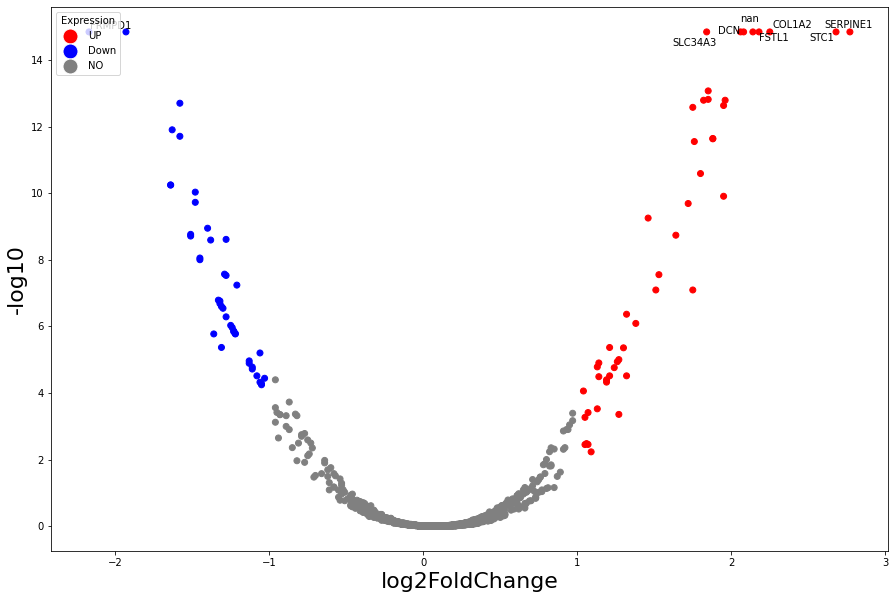

In [6]:
data["-log10"] = -(np.log10(data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"]))
#data = pd.DataFrame.dropna(data)
data["diffexpressed"] = "NO"
# if log2Foldchange > 2 and pvalue < 0.05, set as "UP" 
data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] > 1) & (data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < 0.05)] = "UP"
# if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"
data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] < -1) & (data["Abundance Ratio Adj. P-Value: (T48h) / (T0)"] < 0.05)] = "DOWN"
data["diffexpressed"][(data["Abundance Ratio (log2): (T48h) / (T0)"] > -1) & (data["Abundance Ratio (log2): (T48h) / (T0)"] < 1)] = "NONE"
data["label"] = np.nan
data["label"][data["diffexpressed"] != "NO"] = data["Gene Symbol"][data["diffexpressed"] != "NO"]
mycolors = []

for i in data['diffexpressed']:
    if i == 'NONE':
        mycolors.append('grey')
    elif i == 'UP':
        mycolors.append('red')
    elif i == 'DOWN':
        mycolors.append('blue')
    elif i == "NO":
        mycolors.append('grey')

fig, ax = plt.subplots(figsize=(15,10))

x = data['Abundance Ratio (log2): (T48h) / (T0)']
y = data['-log10']
n = data["Gene Symbol"]
texte = []

ax.scatter(x, y, c=mycolors)

for i, txt in enumerate(n):
    if (x.iloc[i] > 2 and y.iloc[i] > 2) or (x.iloc[i] < -2 and y.iloc[i] > 2):
        texte += [ax.text(x.iloc[i], y.iloc[i],txt)]

ax.set_xlabel("log2FoldChange",fontsize=22)
ax.set_ylabel("-log10",fontsize=22)
legend_elements = [Line2D([0], [0], marker='o',color='w', label='UP',markerfacecolor='red', markersize=15),
               Line2D([0], [0], marker='o', color='w', label='Down',markerfacecolor='blue', markersize=15),
               Line2D([0], [0], marker='o', color='w', label='NO',markerfacecolor='grey', markersize=15)]
ax.legend(handles=legend_elements, title="Expression", loc="upper left")
adjust_text(texte)
plt.show()

In [70]:
import os
def volcano_plot(file, pval, l2FC_up, l2FC_down, label_up, label_down):
    
    data = pd.read_csv(f"Transcriptomic/{file}", sep='\t')
    data["-log10"] = -(np.log10(data["padj"]))
    data = pd.DataFrame.dropna(data)
    data["diffexpressed"] = "NO"
    # if log2Foldchange > 2 and pvalue < 0.05, set as "UP" 
    data["diffexpressed"][(data["log2FoldChange"] > l2FC_up) & (data["padj"] < pval)] = "UP"
    # if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"
    data["diffexpressed"][(data["log2FoldChange"] < l2FC_down) & (data["padj"] < pval)] = "DOWN"
    data["diffexpressed"][(data["log2FoldChange"] > -1) & (data["log2FoldChange"] < 1)] = "NONE"
    data["label"] = np.nan
    data["label"][data["diffexpressed"] != "NO"] = data["symbol"][data["diffexpressed"] != "NO"]
    mycolors = []
    labels={'UP': 'red','DOWN':'blue','NO':'grey'}
    for i in data['diffexpressed']:
        if i == 'NONE':
            mycolors.append('white')
        elif i == 'UP':
            mycolors.append('red')
        elif i == 'DOWN':
            mycolors.append('blue')
        elif i == "NO":
            mycolors.append('grey')
    
    fig, ax = plt.subplots(figsize=(15,10))

    x = data['log2FoldChange']
    y = data['-log10']
    n = data["symbol"]
    texte = []

    ax.scatter(x, y, c=mycolors)

    for i, txt in enumerate(n):
        if (x.iloc[i] > label_up and y.iloc[i] > label_up) or (x.iloc[i] < label_down and y.iloc[i] > label_up):
            texte += [ax.text(x.iloc[i], y.iloc[i],txt)]

    ax.set_xlabel("log2FoldChange",fontsize=22)
    ax.set_ylabel("-log10",fontsize=22)
    legend_elements = [Line2D([0], [0], marker='o',color='w', label='UP',markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Down',markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='NO',markerfacecolor='grey', markersize=15)]
    ax.legend(handles=legend_elements, title="Expression", loc="upper left")
    adjust_text(texte)
    return plt.show() 


In [79]:
element = os.listdir("Transcriptomic/")
file = []
for elm in element:
    if elm.endswith(".txt"):
        file.append(elm)
interact(volcano_plot,file=file, pval =(-0.5,0.5,0.05), l2FC_up=(1,10,0.5), l2FC_down=(-10,-1,0.5), 
         label_up=(5,10,1), label_down=(-10,-1,1))

interactive(children=(Dropdown(description='file', options=('all_de_j2_vs_j0_allgenes.txt', 'all_de_j4_vs_j0_a…

<function __main__.volcano_plot(file, pval, l2FC_up, l2FC_down, label_up, label_down)>